In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [9]:
train = pd.read_csv('train.csv')

In [11]:
train.shape

(891, 12)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
le = LabelEncoder()
for col in ['Name','Sex', 'Ticket', 'Embarked']:
    train[col] = le.fit_transform(train[col])

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,NaN,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,C85,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,NaN,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,C123,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,NaN,2


In [16]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,548,1,27.0,0,0,101,13.00,NaN,2
887,888,1,1,303,0,19.0,0,0,14,30.00,B42,2
888,889,0,3,413,0,NaN,1,2,675,23.45,NaN,2
889,890,1,1,81,1,26.0,0,0,8,30.00,C148,0
890,891,0,3,220,1,32.0,0,0,466,7.75,NaN,1


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(4), int64(5), object(1)
memory usage: 69.7+ KB


# EXPLORATORY DATA ANALYSIS (EDA)

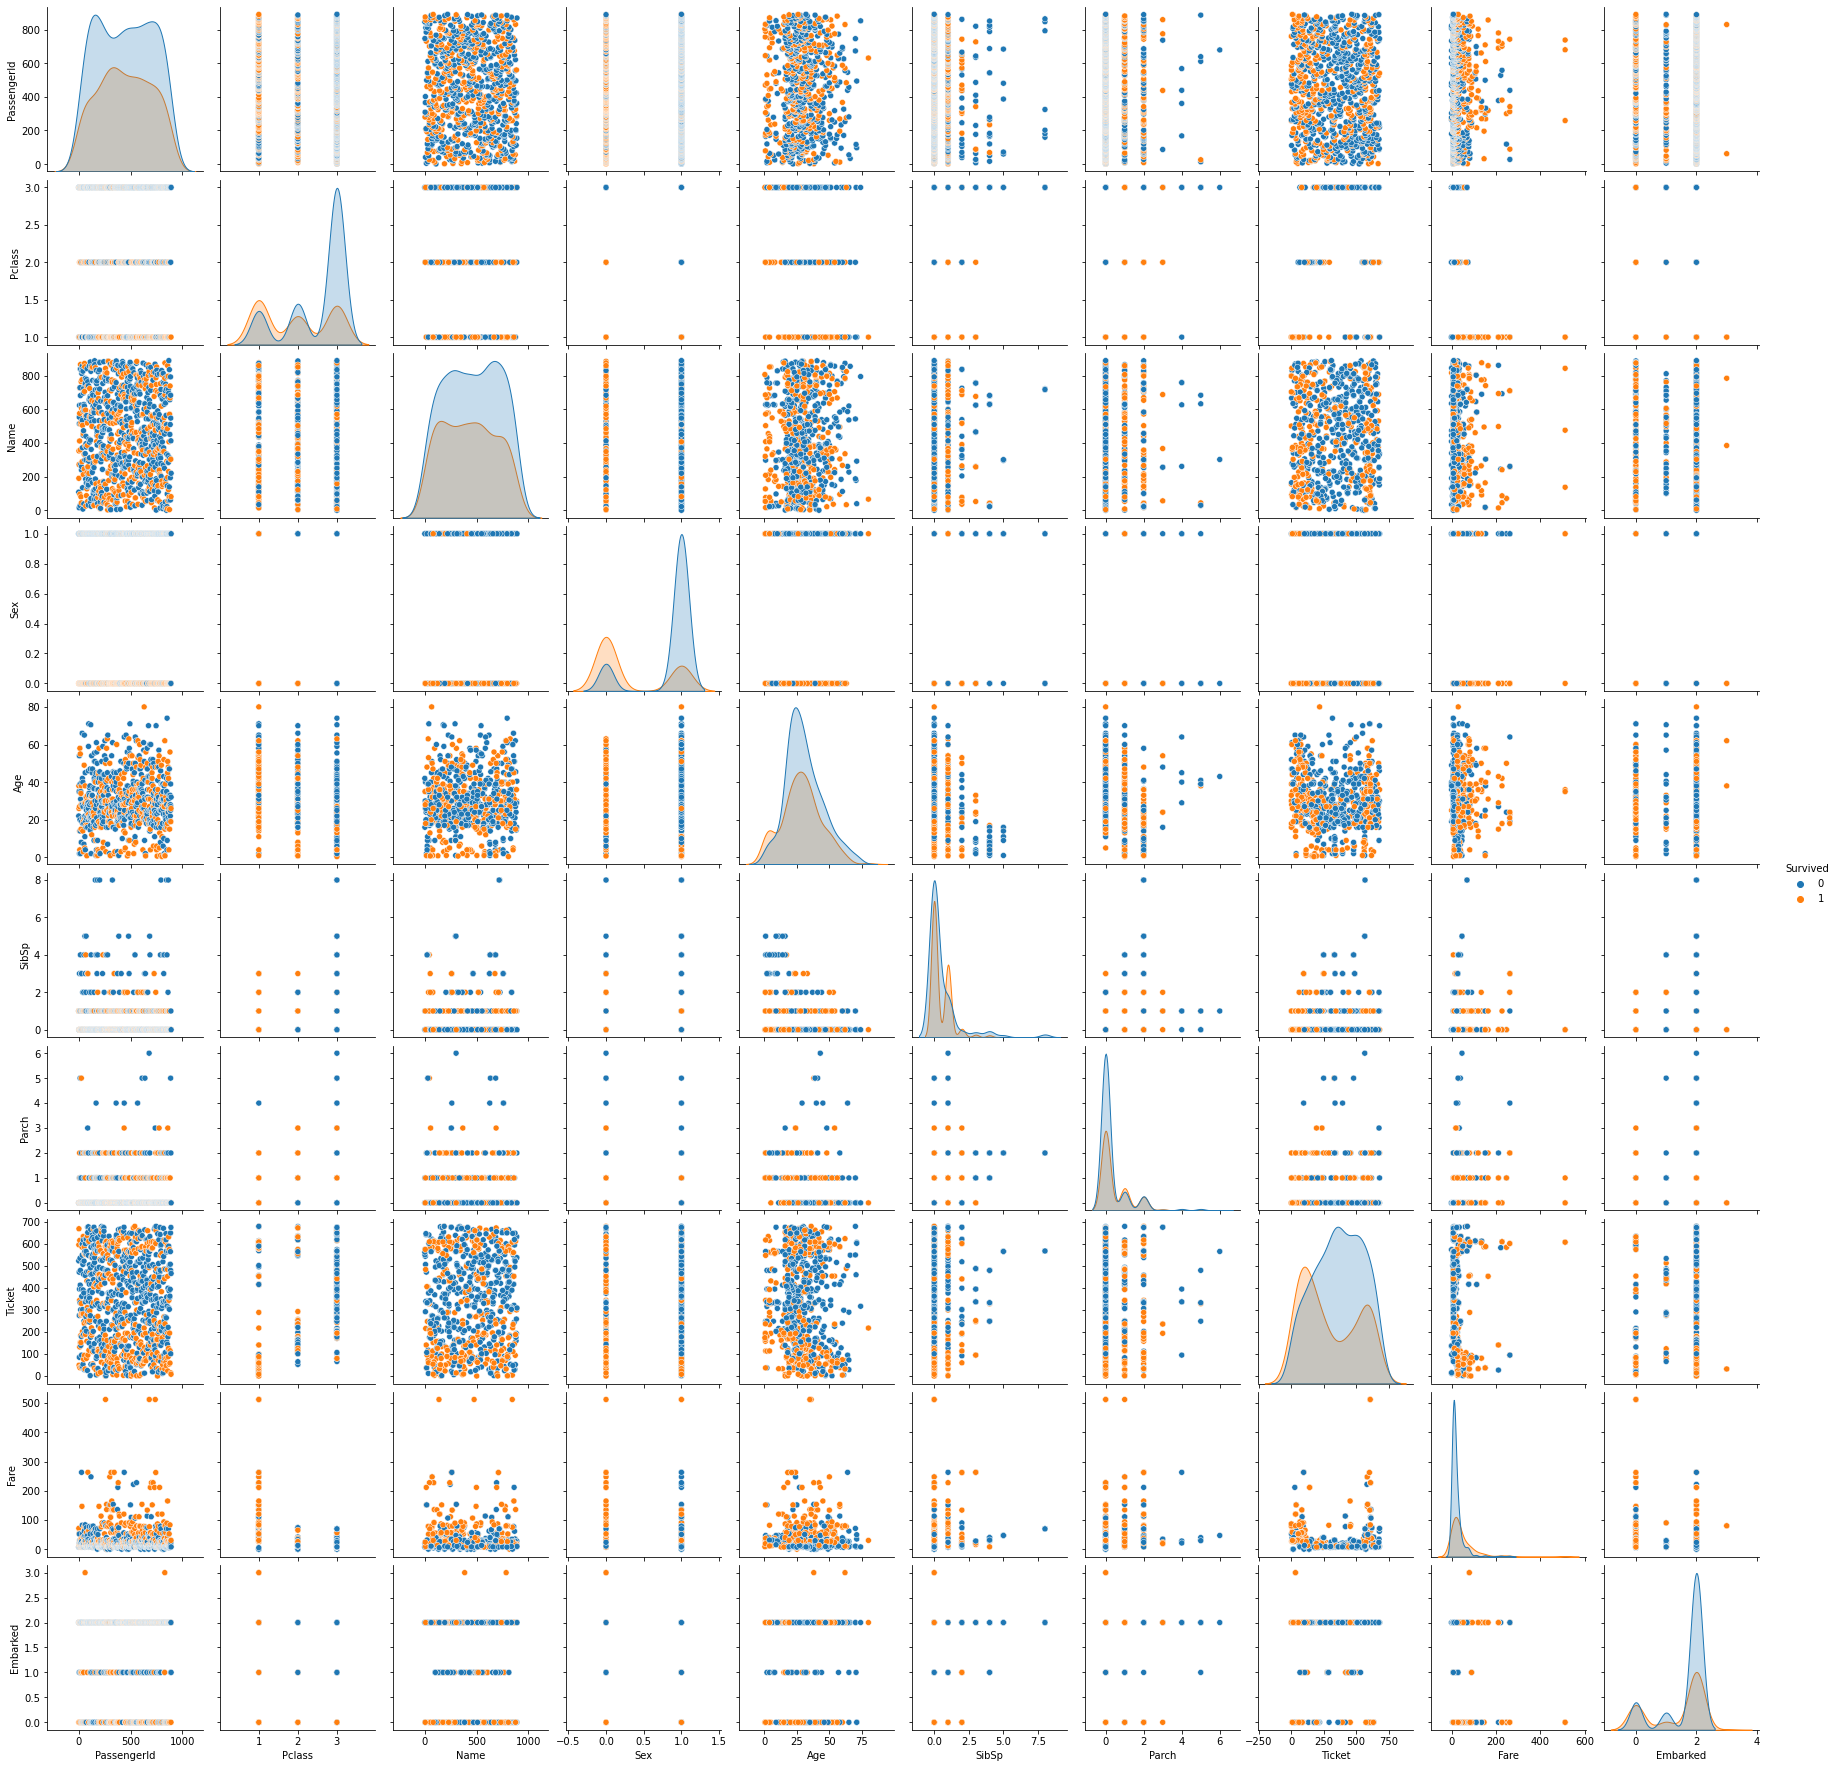

In [18]:
sns.pairplot(train,hue='Survived')

##MISSING DATA

In [19]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

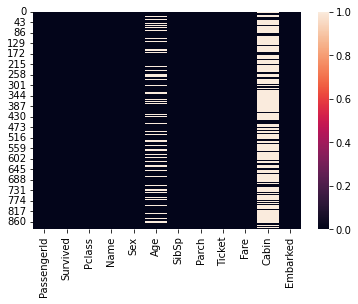

In [20]:
sns.heatmap(train.isnull(),cbar=True,cmap='rocket')

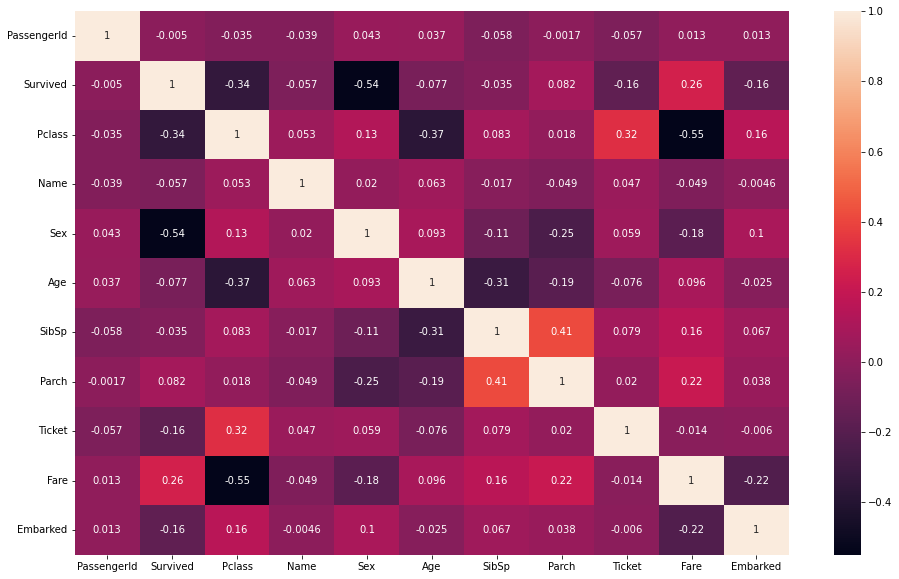

In [21]:
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [22]:
sum(train['Age'].isnull())

177

In [23]:
sum(train['Cabin'].isnull())

687

<AxesSubplot:xlabel='Survived', ylabel='count'>

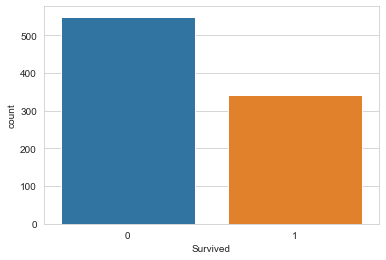

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

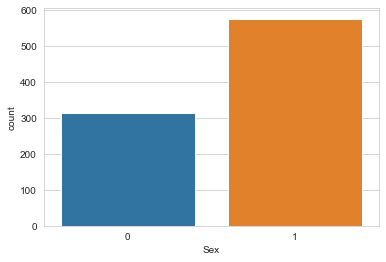

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=train)

In [26]:
train['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

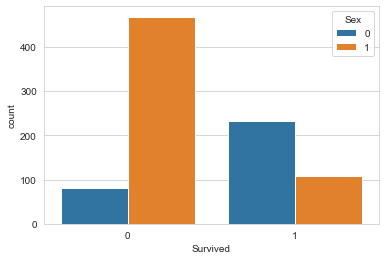

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

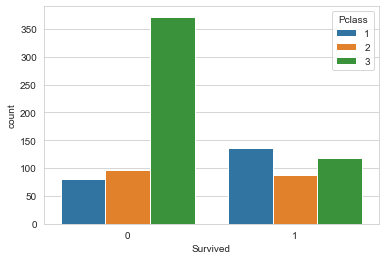

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass',data=train)

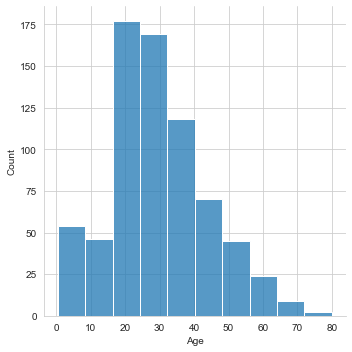

In [29]:
train1 = sns.displot(train['Age'].dropna(),bins=10)

In [30]:
""" fig,ax = plt.subplots(figsize=(6,6))
ax.hist(train['Age']);
ax.set(title = 'Age Count', xlabel='Age', ylabel='Count');
"""

" fig,ax = plt.subplots(figsize=(6,6))\nax.hist(train['Age']);\nax.set(title = 'Age Count', xlabel='Age', ylabel='Count');\n"

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

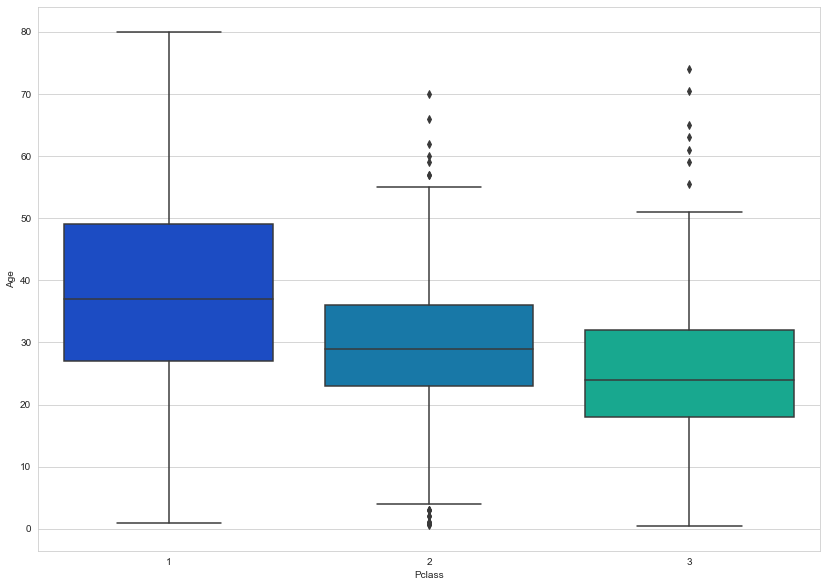

In [31]:
plt.figure(figsize=(14,10))
sns.boxplot(x='Pclass', y='Age',data=train, palette='winter')

In [32]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 28
        
        else:
            return 24
        
    else:
        return Age
        

In [33]:
train['Age']= train[['Age', 'Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

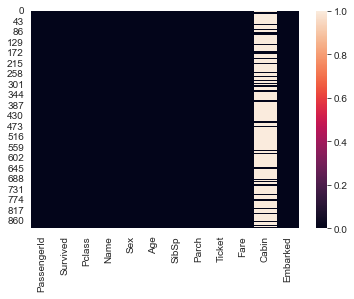

In [34]:
sns.heatmap(train.isnull(),cbar=True,cmap='rocket')

<AxesSubplot:xlabel='Cabin', ylabel='Pclass'>

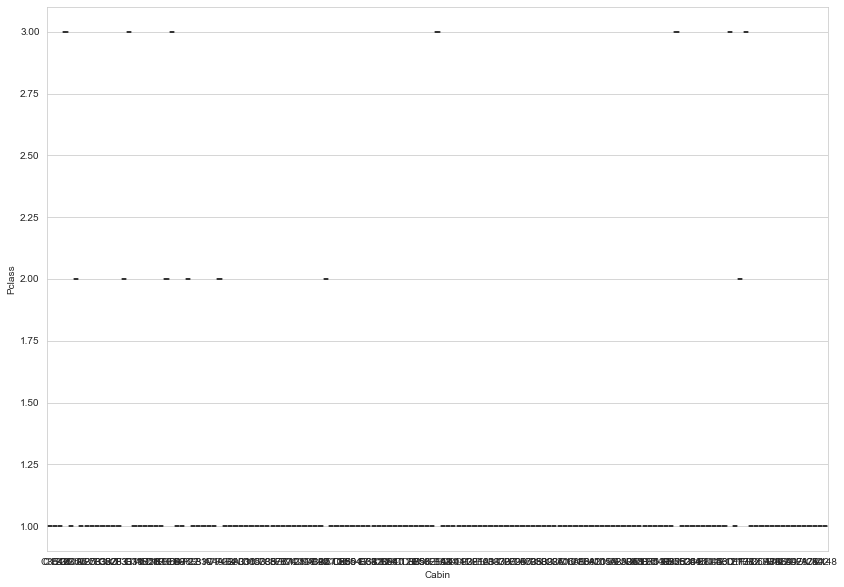

In [35]:
plt.figure(figsize=(14,10))
sns.boxplot(x='Cabin', y='Pclass',data=train, palette='winter')

<AxesSubplot:xlabel='Survived', ylabel='count'>

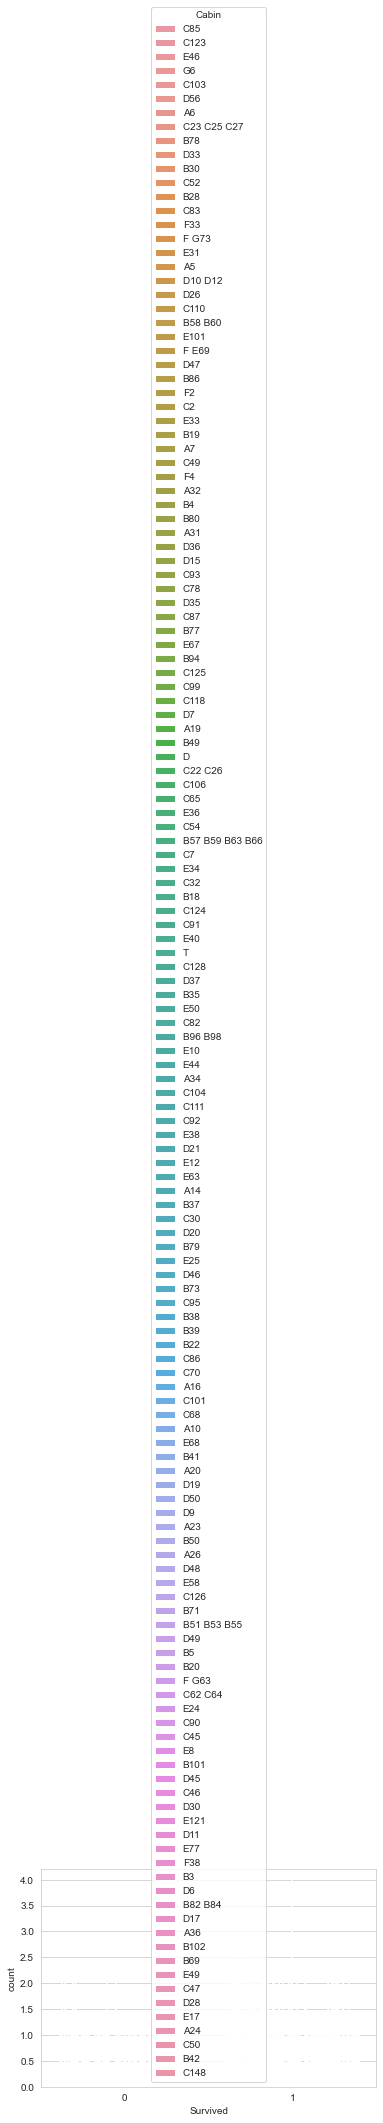

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Cabin',data=train)

<AxesSubplot:xlabel='Cabin', ylabel='count'>

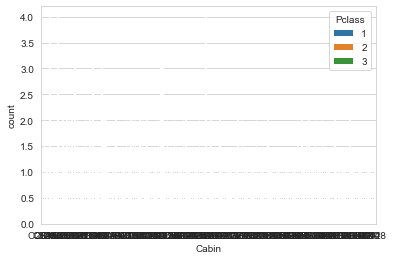

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='Cabin', hue='Pclass',data=train)

<AxesSubplot:>

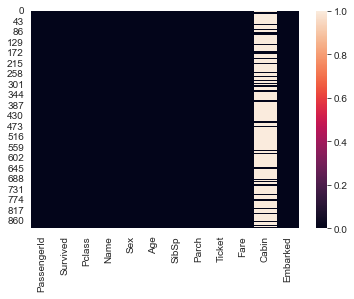

In [38]:
sns.heatmap(train.isnull())

In [39]:
train = train.drop('Cabin', axis=1)

In [40]:
train = train.drop('Name', axis=1)

<AxesSubplot:>

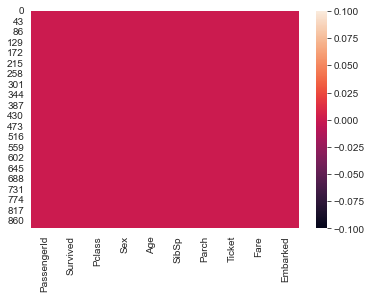

In [41]:
sns.heatmap(train.isnull())

# Random Forest Classifier


In [42]:
y_train=train[['Survived']]

In [43]:
x_train=train.drop(['Survived'],axis=1)

##predicting values

In [44]:
test = pd.read_csv('test.csv')

In [45]:
sum(test['Age'].isnull())

86

In [46]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 28
        
        else:
            return 24
        
    else:
        return Age
        

In [48]:
test['Age']= test[['Age', 'Pclass']].apply(impute_age,axis=1)

In [49]:
test = test.drop('Cabin', axis=1)

In [50]:
test = test.drop('Name', axis=1)

In [51]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,Q
1,893,3,female,47.0,1,0,363272,7.0000,S
2,894,2,male,62.0,0,0,240276,9.6875,Q
3,895,3,male,27.0,0,0,315154,8.6625,S
4,896,3,female,22.0,1,1,3101298,12.2875,S


In [52]:
le = LabelEncoder()
for col in ['Sex','Ticket','Embarked']:
    test[col] = le.fit_transform(test[col])

In [53]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,1,34.5,0,0,152,7.8292,1
1,893,3,0,47.0,1,0,221,7.0000,2
2,894,2,1,62.0,0,0,73,9.6875,1
3,895,3,1,27.0,0,0,147,8.6625,2
4,896,3,0,22.0,1,1,138,12.2875,2


In [54]:
test.isnull()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False
416,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

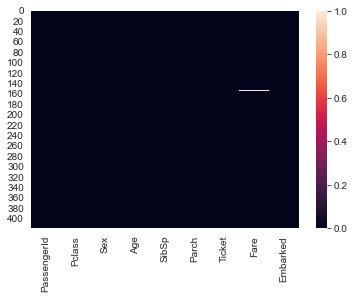

In [55]:
sns.heatmap(test.isnull(),cbar=True,cmap='rocket')

In [56]:
sum(test['Fare'].isnull())

1

In [57]:

def impute_fare(col):
    Fare=col[0]
    
    if pd.isnull(Fare):
        return 9
    
    else:
        return Fare


In [58]:
test['Fare']= test[['Fare']].apply(impute_fare,axis=1)

<AxesSubplot:>

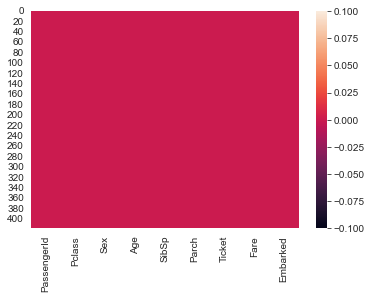

In [59]:
sns.heatmap(test.isnull(),cbar=True,cmap='rocket')

In [60]:
test = test.dropna()

<AxesSubplot:>

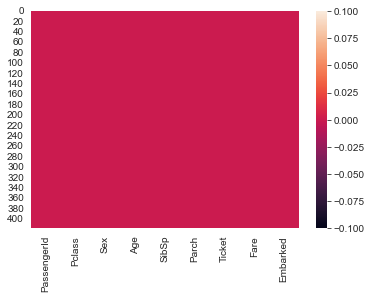

In [61]:
sns.heatmap(test.isnull(),cbar=True,cmap='rocket')

In [62]:
x_test = test

model = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=1)

In [63]:

model.fit(x_train,y_train)


C:\Users\aishs\AppData\Local\Temp/ipykernel_17080/46553094.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier(max_depth=8, n_estimators=200, random_state=1)

In [64]:
predictions = model.predict(x_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)


In [65]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Random Forest Scores of Train set: [nan nan nan nan nan]
Random Forest of train set: nan


C:\Users\aishs\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aishs\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Survived'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\aishs\anaconda3\lib\site-packages\sklearn\utils\__init__.py"